# Capstone Project - Patent Data

## EDA and Data Cleaning

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
## reading in the dataset
df = pd.read_csv('patents1m.csv')

In [95]:
df.head(10)

,Unnamed: 0,publication_number,application_number,country_code,publication_date,filing_date,assignee,family_id,ipc
0,0,EP-3716307-A1,EP-17932779-A,EP,20200930,20171218,['The 41st Institute of China Electronics Tech...,62031869,"[{'code': 'H01H50/00', 'inventive': True, 'fir..."
1,1,JP-2020191060-A,JP-2019151335-A,JP,20201126,20190821,"['廣達電腦股▲ふん▼有限公司Ｑｕａｎｔａ Ｃｏｍｐｕｔｅｒ Ｉｎｃ．', 'Quanta ...",67840994,"[{'code': 'G06F1/20', 'inventive': True, 'firs..."
2,2,IL-250219-B,IL-25021917-A,IL,20220101,20170122,"['REGANDSY and HATES SARL', 'Loic Bresson', 'S...",51352735,[]
3,3,US-2019015283-A1,US-201715648518-A,US,20190117,20170713,['James Earl Jackson'],65000790,"[{'code': 'A61H1/00', 'inventive': True, 'firs..."
4,4,KR-20210078242-A,KR-20190170085-A,KR,20210628,20191218,['엘지디스플레이 주식회사'],76608219,"[{'code': 'G09F9/30', 'inventive': True, 'firs..."
5,5,CN-113091512-A,CN-202110372226-A,CN,20210709,20210407,['合肥英睿系统技术有限公司'],76674690,"[{'code': 'F41G1/46', 'inventive': True, 'firs..."
6,6,AU-2020285671-A1,AU-2020285671-A,AU,20211209,20200527,['Kverneland Group Ravenna S.R.L.'],67957338,"[{'code': 'A01F15/10', 'inventive': False, 'fi..."
7,7,CN-106304518-B,CN-201510242673-A,CN,20190416,20150513,['华润矽威科技（上海）有限公司'],57630890,"[{'code': 'H05B37/02', 'inventive': True, 'fir..."
8,8,CN-111657088-A,CN-202010566953-A,CN,20200915,20200619,"['江苏沿江地区农业科学研究所', '如皋市鑫磊生态家庭农场']",72388926,"[{'code': 'C05G3/60', 'inventive': True, 'firs..."
9,9,CN-114239837-A,CN-202111586532-A,CN,20220325,20211223,['树根互联股份有限公司'],80761871,"[{'code': 'G06N7/00', 'inventive': True, 'firs..."


In [96]:
df.shape

(1000000, 9)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1000000 non-null  int64 
 1   publication_number  1000000 non-null  object
 2   application_number  1000000 non-null  object
 3   country_code        1000000 non-null  object
 4   publication_date    1000000 non-null  int64 
 5   filing_date         1000000 non-null  int64 
 6   assignee            1000000 non-null  object
 7   family_id           1000000 non-null  int64 
 8   ipc                 1000000 non-null  object
dtypes: int64(4), object(5)
memory usage: 68.7+ MB


In [98]:
#Note that there are 0 nulls in the data, however there are nulls in the form of empty lists -- []

In [99]:
df.columns

Index(['Unnamed: 0', 'publication_number', 'application_number',
       'country_code', 'publication_date', 'filing_date', 'assignee',
       'family_id', 'ipc'],
      dtype='object')

In [100]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [101]:
df.dtypes

# noting that dates are integers in the form of yyyymmdd - can work well with that, no need change to datetype.

publication_number    object
application_number    object
country_code          object
publication_date       int64
filing_date            int64
assignee              object
family_id              int64
ipc                   object
dtype: object

In [102]:
country_code_list = df['country_code'].unique()
country_code_list

array(['EP', 'JP', 'IL', 'US', 'KR', 'CN', 'AU', 'RU', 'PL', 'DE', 'BR',
       'FR', 'CA', 'AR', 'ES', 'NL', 'RS', 'TW', 'GB', 'MY', 'PH', 'HU',
       'TR', 'SG', 'MX', 'EA', 'NO', 'HK', 'AT', 'CH', 'UA', 'ZA', 'CL',
       'CO', 'SK', 'NZ', 'BE', 'SA', 'BG', 'FI', 'IT', 'LU', 'MA', 'SE',
       'RO', 'EC', 'PT', 'UY', 'TN', 'PE', 'CZ', 'CR', 'DK', 'SI', 'MD',
       'LV', 'DO', 'LT', 'ME', 'JO', 'HR', 'GR', 'GE', 'IE', 'CU', 'NI',
       'SU', 'SV', 'IS', 'EE', 'IN', 'GT', 'MC'], dtype=object)

In [103]:
## exploring patent families - looking at single inventive concepts for technology landscaping
## Therefore only a single patent per family should be in the dataset
print(len(df['family_id'].value_counts()))
df['family_id'].value_counts()

942611


-1           578
 57796360     24
 60804962     14
 58099621     14
 51843959     13
            ... 
 71401298      1
 59225913      1
 71945052      1
 67190721      1
 62846050      1
Name: family_id, Length: 942611, dtype: int64

In [104]:
df.drop(df[df['family_id'] == -1].index, inplace=True)

In [105]:
family_count = df['family_id'].value_counts()
family_count

57796360    24
58099621    14
60804962    14
51843959    13
62948390    13
            ..
71401298     1
59225913     1
71945052     1
67190721     1
62846050     1
Name: family_id, Length: 942610, dtype: int64

In [106]:
#creating dataframe of family counts
df_family_counts = pd.DataFrame(family_count)
df_family_counts = df_family_counts.reset_index()
df_family_counts.columns = ['family_ID', 'patent count'] # change column names
df_family_counts.drop(df_family_counts[df_family_counts['patent count'] < 2].index, inplace=True)  ## drop rows which don't have multiple patents in family
df_family_counts

,family_ID,patent count
0,57796360,24
1,58099621,14
2,60804962,14
3,51843959,13
4,62948390,13
...,...,...
49278,66379730,2
49279,72042299,2
49280,47913210,2
49281,68534002,2


In [107]:
## dropping patents with same family same - ensuring to keep one of the first filed priority patents
patents_to_drop = []
for id in df_family_counts['family_ID']:
    family = df[df['family_id'] == id]  ## for each family id set dataframe to the family
    for p in range(len(family)):
        patents_to_drop.append(family['application_number'].iloc[p]) ## add all patents in family to drop list
    family_priority = family[family['filing_date']==family['filing_date'].min()] ## first filed patents
    family_country_count = pd.DataFrame(family_priority['country_code'].value_counts()).reset_index()
    top_country = family_country_count['index'][0]
    patent_list = family[family['country_code']== top_country] ##most represented territory of originally filed patents as maintained information
    patents_to_drop.remove(patent_list['application_number'].iloc[0]) ##take top patent to retain in dataset - dropping the rest

len(patents_to_drop)

56812

In [108]:
# now drop the list of patents
df.drop(df[df['application_number'].isin(patents_to_drop)].index, inplace=True)

In [109]:
df.shape # 930,000 rows left

(933159, 8)

## Country Code to Country Name Mapping

In [110]:
## Dictionary mapping each country code to the country - obtained from the world patent organisation website

countrycode_lookup = {'AL' : 'Albania',
'AP' : 'African Regional Industrial Property Organization',
'AR' : 'Argentina',
'AT' : 'Austria',
'AU' : 'Australia',
'BA' : 'Bosnia and Herzegovina',
'BE' : 'Belgium',
'BG' : 'Bulgaria',
'BR' : 'Brazil',
'CA' : 'Canada',
'CH' : 'Switzerland',
'CL' : 'Chile',
'CN' : 'China',
'CO' : 'Colombia',
'CR' : 'Costa Rica',
'CS' : 'Czechoslovakia (up to 1993)',
'CU' : 'Cuba',
'CY' : 'Cyprus',
'CZ' : 'Czech Republic',
'DD' : 'Germany, excluding the territory that, prior to 3 October 1990, constituted the Federal Republic of Germany',
'DE' : 'Germany',
'DK' : 'Denmark',
'DZ' : 'Algeria',
'EA' : 'Eurasian Patent Organisation',
'EC' : 'Ecuador',
'EE' : 'Estonia',
'EG' : 'Egypt',
'EP' : 'European Patent Office',
'ES' : 'Spain',
'FI' : 'Finland',
'FR' : 'France',
'GB' : 'United Kingdom',
'GC' : 'Gulf Cooperation Council',
'GE' : 'Georgia',
'GR' : 'Greece',
'GT' : 'Guatemala',
'HK' : 'Hong Kong (China)',
'HR' : 'Croatia',
'HU' : 'Hungary',
'ID' : 'Indonesia',
'IE' : 'Ireland',
'IL' : 'Israel',
'IN' : 'India',
'IS' : 'Iceland',
'IT' : 'Italy',
'JP' : 'Japan',
'KE' : 'Kenya',
'KR' : 'Republic of Korea',
'LI' : 'Liechtenstein',
'LT' : 'Lithuania',
'LU' : 'Luxembourg',
'LV' : 'Latvia',
'MA' : 'Morocco',
'MC' : 'Monaco',
'MD' : 'Republic of Moldova',
'ME' : 'Montenegro',
'MK' : 'Republic of North Macedonia',
'MN' : 'Mongolia',
'MT' : 'Malta',
'MW' : 'Malawi',
'MX' : 'Mexico',
'MY' : 'Malaysia',
'NC' : 'New Caledonia',
'NI' : 'Nicaragua',
'NL' : 'Netherlands',
'NO' : 'Norway',
'NZ' : 'New Zealand',
'OA' : 'African Intellectual Property Organization',
'PA' : 'Panama',
'PE' : 'Peru',
'PH' : 'Philippines',
'PL' : 'Poland',
'PT' : 'Portugal',
'RO' : 'Romania',
'RS' : 'Serbia',
'RU' : 'Russia',
'SE' : 'Sweden',
'SG' : 'Singapore',
'SI' : 'Slovenia',
'SK' : 'Slovakia',
'SM' : 'San Marino',
'SU' : 'Union of Soviet Socialist Republics (USSR)',
'SV' : 'El Salvador',
'TJ' : 'Tajikistan',
'TR' : 'Turkey',
'TT' : 'Trinidad and Tobago',
'TW' : 'Chinese Taipei',
'UA' : 'Ukraine',
'US' : 'United States of America',
'UY' : 'Uruguay',
'VN' : 'Vietnam',
'WO' : 'World Intellectual Property Organisation (WIPO)',
'YU' : 'Yugoslavia (Serbia and Montenegro)',
'ZA' : 'South Africa',
'ZM' : 'Zambia',
'ZW' : 'Zimbabwe'}

In [111]:
## mapping new column country_name to lookup dictionary

df['country_name'] = df['country_code']
df['country_name'] = df['country_name'].map(countrycode_lookup)
df.head(10)

,publication_number,application_number,country_code,publication_date,filing_date,assignee,family_id,ipc,country_name
0,EP-3716307-A1,EP-17932779-A,EP,20200930,20171218,['The 41st Institute of China Electronics Tech...,62031869,"[{'code': 'H01H50/00', 'inventive': True, 'fir...",European Patent Office
1,JP-2020191060-A,JP-2019151335-A,JP,20201126,20190821,"['廣達電腦股▲ふん▼有限公司Ｑｕａｎｔａ Ｃｏｍｐｕｔｅｒ Ｉｎｃ．', 'Quanta ...",67840994,"[{'code': 'G06F1/20', 'inventive': True, 'firs...",Japan
2,IL-250219-B,IL-25021917-A,IL,20220101,20170122,"['REGANDSY and HATES SARL', 'Loic Bresson', 'S...",51352735,[],Israel
3,US-2019015283-A1,US-201715648518-A,US,20190117,20170713,['James Earl Jackson'],65000790,"[{'code': 'A61H1/00', 'inventive': True, 'firs...",United States of America
4,KR-20210078242-A,KR-20190170085-A,KR,20210628,20191218,['엘지디스플레이 주식회사'],76608219,"[{'code': 'G09F9/30', 'inventive': True, 'firs...",Republic of Korea
5,CN-113091512-A,CN-202110372226-A,CN,20210709,20210407,['合肥英睿系统技术有限公司'],76674690,"[{'code': 'F41G1/46', 'inventive': True, 'firs...",China
6,AU-2020285671-A1,AU-2020285671-A,AU,20211209,20200527,['Kverneland Group Ravenna S.R.L.'],67957338,"[{'code': 'A01F15/10', 'inventive': False, 'fi...",Australia
7,CN-106304518-B,CN-201510242673-A,CN,20190416,20150513,['华润矽威科技（上海）有限公司'],57630890,"[{'code': 'H05B37/02', 'inventive': True, 'fir...",China
8,CN-111657088-A,CN-202010566953-A,CN,20200915,20200619,"['江苏沿江地区农业科学研究所', '如皋市鑫磊生态家庭农场']",72388926,"[{'code': 'C05G3/60', 'inventive': True, 'firs...",China
9,CN-114239837-A,CN-202111586532-A,CN,20220325,20211223,['树根互联股份有限公司'],80761871,"[{'code': 'G06N7/00', 'inventive': True, 'firs...",China


# IPC Code Mapping & IPC column cleaning

In [112]:
(df['ipc'][0])
## ipc column is str type

"[{'code': 'H01H50/00', 'inventive': True, 'first': True, 'tree': []}]"

In [113]:
## Exploration of the contents of the ipc column - looking at first 50 full
for i in range(10):
    print(df['ipc'][i])

[{'code': 'H01H50/00', 'inventive': True, 'first': True, 'tree': []}]
[{'code': 'G06F1/20', 'inventive': True, 'first': True, 'tree': []}, {'code': 'H05K7/20', 'inventive': True, 'first': False, 'tree': []}, {'code': 'G06F1/16', 'inventive': True, 'first': False, 'tree': []}]
[]
[{'code': 'A61H1/00', 'inventive': True, 'first': True, 'tree': []}, {'code': 'A41C1/00', 'inventive': True, 'first': False, 'tree': []}]
[{'code': 'G09F9/30', 'inventive': True, 'first': True, 'tree': []}, {'code': 'G06F1/16', 'inventive': True, 'first': False, 'tree': []}, {'code': 'H01L51/00', 'inventive': True, 'first': False, 'tree': []}]
[{'code': 'F41G1/46', 'inventive': True, 'first': True, 'tree': []}, {'code': 'F41G1/473', 'inventive': True, 'first': False, 'tree': []}]
[{'code': 'A01F15/10', 'inventive': False, 'first': False, 'tree': []}, {'code': 'A01F15/00', 'inventive': True, 'first': True, 'tree': []}]
[{'code': 'H05B37/02', 'inventive': True, 'first': True, 'tree': []}]
[{'code': 'C05G3/60', 'i

In [114]:
def ipc_clean(string):
    ''' Function to clean ipc column to into a clean list of the stated IPC codes only'''
    string = string.replace('[','')
    string = string.replace(']','')
    string = string.replace('{','')
    string = string.replace('}','')
    string = string.replace("'",'')
    string = string.replace(':','')
    string = string.replace(',','')
    string = string.replace('code','')
    string = string.replace('True','')
    string = string.replace('False','')
    string = string.replace('inventive','')
    string = string.replace('first','')
    string = string.replace('tree','')
    string = string.strip()
    string = string.split()
    return string


In [115]:
## apply the ipc clean function to the ipc row as a new row - ipc_codes_full
df['ipc_codes_full'] = df['ipc']

df['ipc_codes_full'] = df.apply(lambda x: ipc_clean(x['ipc_codes_full']), axis=1)

df.head(10)

,publication_number,application_number,country_code,publication_date,filing_date,assignee,family_id,ipc,country_name,ipc_codes_full
0,EP-3716307-A1,EP-17932779-A,EP,20200930,20171218,['The 41st Institute of China Electronics Tech...,62031869,"[{'code': 'H01H50/00', 'inventive': True, 'fir...",European Patent Office,[H01H50/00]
1,JP-2020191060-A,JP-2019151335-A,JP,20201126,20190821,"['廣達電腦股▲ふん▼有限公司Ｑｕａｎｔａ Ｃｏｍｐｕｔｅｒ Ｉｎｃ．', 'Quanta ...",67840994,"[{'code': 'G06F1/20', 'inventive': True, 'firs...",Japan,"[G06F1/20, H05K7/20, G06F1/16]"
2,IL-250219-B,IL-25021917-A,IL,20220101,20170122,"['REGANDSY and HATES SARL', 'Loic Bresson', 'S...",51352735,[],Israel,[]
3,US-2019015283-A1,US-201715648518-A,US,20190117,20170713,['James Earl Jackson'],65000790,"[{'code': 'A61H1/00', 'inventive': True, 'firs...",United States of America,"[A61H1/00, A41C1/00]"
4,KR-20210078242-A,KR-20190170085-A,KR,20210628,20191218,['엘지디스플레이 주식회사'],76608219,"[{'code': 'G09F9/30', 'inventive': True, 'firs...",Republic of Korea,"[G09F9/30, G06F1/16, H01L51/00]"
5,CN-113091512-A,CN-202110372226-A,CN,20210709,20210407,['合肥英睿系统技术有限公司'],76674690,"[{'code': 'F41G1/46', 'inventive': True, 'firs...",China,"[F41G1/46, F41G1/473]"
6,AU-2020285671-A1,AU-2020285671-A,AU,20211209,20200527,['Kverneland Group Ravenna S.R.L.'],67957338,"[{'code': 'A01F15/10', 'inventive': False, 'fi...",Australia,"[A01F15/10, A01F15/00]"
7,CN-106304518-B,CN-201510242673-A,CN,20190416,20150513,['华润矽威科技（上海）有限公司'],57630890,"[{'code': 'H05B37/02', 'inventive': True, 'fir...",China,[H05B37/02]
8,CN-111657088-A,CN-202010566953-A,CN,20200915,20200619,"['江苏沿江地区农业科学研究所', '如皋市鑫磊生态家庭农场']",72388926,"[{'code': 'C05G3/60', 'inventive': True, 'firs...",China,"[C05G3/60, C05F11/00, A01N65/30, A01P3/00, A01..."
9,CN-114239837-A,CN-202111586532-A,CN,20220325,20211223,['树根互联股份有限公司'],80761871,"[{'code': 'G06N7/00', 'inventive': True, 'firs...",China,[G06N7/00]


In [116]:
## Drop all rows with no ipc code
df.drop(df[df['ipc_codes_full'].map(len) == 0].index, inplace=True)

In [117]:
df.shape  ## about 14000 rows dropped

(921461, 10)

In [118]:
## this works for extracting the subclasses from the ipc column
[x[:3] for x in df['ipc_codes_full'][1]]

['G06', 'H05', 'G06']

In [119]:
def ipc_subclass_extract(list):
    return set([x[:3] for x in list])

In [120]:
df['ipc_subclass'] = df['ipc_codes_full']

df['ipc_subclass'] = df.apply(lambda x: ipc_subclass_extract(x['ipc_subclass']), axis=1)

df.head(10)

,publication_number,application_number,country_code,publication_date,filing_date,assignee,family_id,ipc,country_name,ipc_codes_full,ipc_subclass
0,EP-3716307-A1,EP-17932779-A,EP,20200930,20171218,['The 41st Institute of China Electronics Tech...,62031869,"[{'code': 'H01H50/00', 'inventive': True, 'fir...",European Patent Office,[H01H50/00],{H01}
1,JP-2020191060-A,JP-2019151335-A,JP,20201126,20190821,"['廣達電腦股▲ふん▼有限公司Ｑｕａｎｔａ Ｃｏｍｐｕｔｅｒ Ｉｎｃ．', 'Quanta ...",67840994,"[{'code': 'G06F1/20', 'inventive': True, 'firs...",Japan,"[G06F1/20, H05K7/20, G06F1/16]","{H05, G06}"
3,US-2019015283-A1,US-201715648518-A,US,20190117,20170713,['James Earl Jackson'],65000790,"[{'code': 'A61H1/00', 'inventive': True, 'firs...",United States of America,"[A61H1/00, A41C1/00]","{A61, A41}"
4,KR-20210078242-A,KR-20190170085-A,KR,20210628,20191218,['엘지디스플레이 주식회사'],76608219,"[{'code': 'G09F9/30', 'inventive': True, 'firs...",Republic of Korea,"[G09F9/30, G06F1/16, H01L51/00]","{H01, G09, G06}"
5,CN-113091512-A,CN-202110372226-A,CN,20210709,20210407,['合肥英睿系统技术有限公司'],76674690,"[{'code': 'F41G1/46', 'inventive': True, 'firs...",China,"[F41G1/46, F41G1/473]",{F41}
6,AU-2020285671-A1,AU-2020285671-A,AU,20211209,20200527,['Kverneland Group Ravenna S.R.L.'],67957338,"[{'code': 'A01F15/10', 'inventive': False, 'fi...",Australia,"[A01F15/10, A01F15/00]",{A01}
7,CN-106304518-B,CN-201510242673-A,CN,20190416,20150513,['华润矽威科技（上海）有限公司'],57630890,"[{'code': 'H05B37/02', 'inventive': True, 'fir...",China,[H05B37/02],{H05}
8,CN-111657088-A,CN-202010566953-A,CN,20200915,20200619,"['江苏沿江地区农业科学研究所', '如皋市鑫磊生态家庭农场']",72388926,"[{'code': 'C05G3/60', 'inventive': True, 'firs...",China,"[C05G3/60, C05F11/00, A01N65/30, A01P3/00, A01...","{C05, A01}"
9,CN-114239837-A,CN-202111586532-A,CN,20220325,20211223,['树根互联股份有限公司'],80761871,"[{'code': 'G06N7/00', 'inventive': True, 'firs...",China,[G06N7/00],{G06}
10,JP-2021176159-A,JP-2020081026-A,JP,20211104,20200501,"['三菱電機エンジニアリング株式会社', 'Mitsubishi Electric Engi...",78300495,"[{'code': 'H01L35/06', 'inventive': True, 'fir...",Japan,"[H01L35/06, H02N11/00]","{H02, H01}"


In [121]:
set([x[0] for x in df['ipc_codes_full'][1]])

{'G', 'H'}

In [122]:
# get each class letter for each patent
def ipc_class_extract(list):
    return set([x[0] for x in list])

In [123]:
df['ipc_class'] = df['ipc_codes_full']

df['ipc_class'] = df.apply(lambda x: ipc_class_extract(x['ipc_class']), axis=1)

df.head(10)

,publication_number,application_number,country_code,publication_date,filing_date,assignee,family_id,ipc,country_name,ipc_codes_full,ipc_subclass,ipc_class
0,EP-3716307-A1,EP-17932779-A,EP,20200930,20171218,['The 41st Institute of China Electronics Tech...,62031869,"[{'code': 'H01H50/00', 'inventive': True, 'fir...",European Patent Office,[H01H50/00],{H01},{H}
1,JP-2020191060-A,JP-2019151335-A,JP,20201126,20190821,"['廣達電腦股▲ふん▼有限公司Ｑｕａｎｔａ Ｃｏｍｐｕｔｅｒ Ｉｎｃ．', 'Quanta ...",67840994,"[{'code': 'G06F1/20', 'inventive': True, 'firs...",Japan,"[G06F1/20, H05K7/20, G06F1/16]","{H05, G06}","{G, H}"
3,US-2019015283-A1,US-201715648518-A,US,20190117,20170713,['James Earl Jackson'],65000790,"[{'code': 'A61H1/00', 'inventive': True, 'firs...",United States of America,"[A61H1/00, A41C1/00]","{A61, A41}",{A}
4,KR-20210078242-A,KR-20190170085-A,KR,20210628,20191218,['엘지디스플레이 주식회사'],76608219,"[{'code': 'G09F9/30', 'inventive': True, 'firs...",Republic of Korea,"[G09F9/30, G06F1/16, H01L51/00]","{H01, G09, G06}","{G, H}"
5,CN-113091512-A,CN-202110372226-A,CN,20210709,20210407,['合肥英睿系统技术有限公司'],76674690,"[{'code': 'F41G1/46', 'inventive': True, 'firs...",China,"[F41G1/46, F41G1/473]",{F41},{F}
6,AU-2020285671-A1,AU-2020285671-A,AU,20211209,20200527,['Kverneland Group Ravenna S.R.L.'],67957338,"[{'code': 'A01F15/10', 'inventive': False, 'fi...",Australia,"[A01F15/10, A01F15/00]",{A01},{A}
7,CN-106304518-B,CN-201510242673-A,CN,20190416,20150513,['华润矽威科技（上海）有限公司'],57630890,"[{'code': 'H05B37/02', 'inventive': True, 'fir...",China,[H05B37/02],{H05},{H}
8,CN-111657088-A,CN-202010566953-A,CN,20200915,20200619,"['江苏沿江地区农业科学研究所', '如皋市鑫磊生态家庭农场']",72388926,"[{'code': 'C05G3/60', 'inventive': True, 'firs...",China,"[C05G3/60, C05F11/00, A01N65/30, A01P3/00, A01...","{C05, A01}","{A, C}"
9,CN-114239837-A,CN-202111586532-A,CN,20220325,20211223,['树根互联股份有限公司'],80761871,"[{'code': 'G06N7/00', 'inventive': True, 'firs...",China,[G06N7/00],{G06},{G}
10,JP-2021176159-A,JP-2020081026-A,JP,20211104,20200501,"['三菱電機エンジニアリング株式会社', 'Mitsubishi Electric Engi...",78300495,"[{'code': 'H01L35/06', 'inventive': True, 'fir...",Japan,"[H01L35/06, H02N11/00]","{H02, H01}",{H}


In [124]:
## Dictionary mapping each subclass to the subclass description - obtained from the world patent organisation website
ipc_subclass_mapping = {'A01' : 'AGRICULTURE; FORESTRY; ANIMAL HUSBANDRY; HUNTING; TRAPPING; FISHING',
            'A21' : 'BAKING; EQUIPMENT FOR MAKING OR PROCESSING DOUGHS; DOUGHS FOR BAKING',
            'A22' : 'BUTCHERING; MEAT TREATMENT; PROCESSING POULTRY OR FISH',
            'A23' : 'FOODS OR FOODSTUFFS; TREATMENT THEREOF, NOT COVERED BY OTHER CLASSES',
            'A24' : "TOBACCO; CIGARS; CIGARETTES; SIMULATED SMOKING DEVICES; SMOKERS'REQUISITES",
            'A41' : 'WEARING APPAREL',
            'A42' : 'HEADWEAR',
            'A43' : 'FOOTWEAR',
            'A44' : 'HABERDASHERY; JEWELLERY',
            'A45' : 'HAND OR TRAVELLING ARTICLES',
            'A46' : 'BRUSHWARE',
            'A47' : 'FURNITURE; DOMESTIC ARTICLES OR APPLIANCES; COFFEE MILLS; SPICE MILLS; SUCTION CLEANERS IN GENERAL',
            'A61' : 'MEDICAL OR VETERINARY SCIENCE; HYGIENE',
            'A62' : 'LIFE-SAVING; FIRE-FIGHTING',
            'A63' : 'SPORTS; GAMES; AMUSEMENTS',
            'A99' : 'SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN THIS SECTION',
            'B01' : 'PHYSICAL OR CHEMICAL PROCESSES OR APPARATUS IN GENERAL',
            'B02' : 'CRUSHING, PULVERISING, OR DISINTEGRATING; PREPARATORY TREATMENT OF GRAIN FOR MILLING',
            'B03' : 'SEPARATION OF SOLID MATERIALS USING LIQUIDS OR USING PNEUMATIC TABLES OR JIGS; MAGNETIC OR ELECTROSTATIC SEPARATION OF SOLID MATERIALS FROM SOLID MATERIALS OR FLUIDS; SEPARATION BY HIGH-VOLTAGE ELECTRIC FIELDS',
            'B04' : 'CENTRIFUGAL APPARATUS OR MACHINES FOR CARRYING-OUT PHYSICAL OR CHEMICAL PROCESSES',
            'B05' : 'SPRAYING OR ATOMISING IN GENERAL; APPLYING FLUENT MATERIALS TO SURFACES, IN GENERAL',
            'B06' : 'GENERATING OR TRANSMITTING MECHANICAL VIBRATIONS IN GENERAL',
            'B07' : 'SEPARATING SOLIDS FROM SOLIDS; SORTING',
            'B08' : 'CLEANING',
            'B09' : 'DISPOSAL OF SOLID WASTE; RECLAMATION OF CONTAMINATED SOIL',
            'B21' : 'MECHANICAL METAL-WORKING WITHOUT ESSENTIALLY REMOVING MATERIAL; PUNCHING METAL',
            'B22' : 'CASTING; POWDER METALLURGY',
            'B23' : 'MACHINE TOOLS; METAL-WORKING NOT OTHERWISE PROVIDED FOR',
            'B24' : 'GRINDING; POLISHING',
            'B25' : 'HAND TOOLS; PORTABLE POWER-DRIVEN TOOLS; HANDLES FOR HAND IMPLEMENTS; WORKSHOP EQUIPMENT; MANIPULATORS',
            'B26' : 'HAND CUTTING TOOLS; CUTTING; SEVERING',
            'B27' : 'WORKING OR PRESERVING WOOD OR SIMILAR MATERIAL; NAILING OR STAPLING MACHINES IN GENERAL',
            'B28' : 'WORKING CEMENT, CLAY, OR STONE',
            'B29' : 'WORKING OF PLASTICS; WORKING OF SUBSTANCES IN A PLASTIC STATE IN GENERAL',
            'B30' : 'PRESSES',
            'B31' : 'MAKING ARTICLES OF PAPER, CARDBOARD OR MATERIAL WORKED IN A MANNER ANALOGOUS TO PAPER; WORKING PAPER, CARDBOARD OR MATERIAL WORKED IN A MANNER ANALOGOUS TO PAPER',
            'B32' : 'LAYERED PRODUCTS',
            'B33' : 'ADDITIVE MANUFACTURING TECHNOLOGY',
            'B41' : 'PRINTING; LINING MACHINES; TYPEWRITERS; STAMPS',
            'B42' : 'BOOKBINDING; ALBUMS; FILES; SPECIAL PRINTED MATTER',
            'B43' : 'WRITING OR DRAWING IMPLEMENTS; BUREAU ACCESSORIES',
            'B44' : 'DECORATIVE ARTS',
            'B60' : 'VEHICLES IN GENERAL',
            'B61' : 'RAILWAYS',
            'B62' : 'LAND VEHICLES FOR TRAVELLING OTHERWISE THAN ON RAILS',
            'B63' : 'SHIPS OR OTHER WATERBORNE VESSELS; RELATED EQUIPMENT',
            'B64' : 'AIRCRAFT; AVIATION; COSMONAUTICS',
            'B65' : 'CONVEYING; PACKING; STORING; HANDLING THIN OR FILAMENTARY MATERIAL',
            'B66' : 'HOISTING; LIFTING; HAULING',
            'B67' : 'OPENING OR CLOSING BOTTLES, JARS OR SIMILAR CONTAINERS; LIQUID HANDLING',
            'B68' : 'SADDLERY; UPHOLSTERY',
            'B81' : 'MICROSTRUCTURAL TECHNOLOGY',
            'B82' : 'NANOTECHNOLOGY',
            'B99' : 'SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN THIS SECTION',
            'C01' : 'INORGANIC CHEMISTRY',
            'C02' : 'TREATMENT OF WATER, WASTE WATER, SEWAGE, OR SLUDGE',
            'C03' : 'GLASS; MINERAL OR SLAG WOOL',
            'C04' : 'CEMENTS; CONCRETE; ARTIFICIAL STONE; CERAMICS; REFRACTORIES',
            'C05' : 'FERTILISERS; MANUFACTURE THEREOF',
            'C06' : 'EXPLOSIVES; MATCHES',
            'C07' : 'ORGANIC CHEMISTRY',
            'C08' : 'ORGANIC MACROMOLECULAR COMPOUNDS; THEIR PREPARATION OR CHEMICAL WORKING-UP; COMPOSITIONS BASED THEREON',
            'C09' : 'DYES; PAINTS; POLISHES; NATURAL RESINS; ADHESIVES; COMPOSITIONS NOT OTHERWISE PROVIDED FOR; APPLICATIONS OF MATERIALS NOT OTHERWISE PROVIDED FOR',
            'C10' : 'PETROLEUM, GAS OR COKE INDUSTRIES; TECHNICAL GASES CONTAINING CARBON MONOXIDE; FUELS; LUBRICANTS; PEAT',
            'C11' : 'ANIMAL OR VEGETABLE OILS, FATS, FATTY SUBSTANCES OR WAXES; FATTY ACIDS THEREFROM; DETERGENTS; CANDLES',
            'C12' : 'BIOCHEMISTRY; BEER; SPIRITS; WINE; VINEGAR; MICROBIOLOGY; ENZYMOLOGY; MUTATION OR GENETIC ENGINEERING',
            'C13' : 'SUGAR INDUSTRY',
            'C14' : 'SKINS; HIDES; PELTS OR LEATHER',
            'C21' : 'METALLURGY OF IRON',
            'C22' : 'METALLURGY; FERROUS OR NON-FERROUS ALLOYS; TREATMENT OF ALLOYS OR NON-FERROUS METALS',
            'C23' : 'COATING METALLIC MATERIAL; COATING MATERIAL WITH METALLIC MATERIAL; CHEMICAL SURFACE TREATMENT; DIFFUSION TREATMENT OF METALLIC MATERIAL; COATING BY VACUUM EVAPORATION, BY SPUTTERING, BY ION IMPLANTATION OR BY CHEMICAL VAPOUR DEPOSITION, IN GENERAL; INHIBITING CORROSION OF METALLIC MATERIAL OR INCRUSTATION IN GENERAL',
            'C25' : 'ELECTROLYTIC OR ELECTROPHORETIC PROCESSES; APPARATUS THEREFOR',
            'C30' : 'CRYSTAL GROWTH',
            'C40' : 'COMBINATORIAL TECHNOLOGY',
            'C99' : 'SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN THIS SECTION',
            'D01' : 'NATURAL OR MAN-MADE THREADS OR FIBRES; SPINNING',
            'D02' : 'YARNS; MECHANICAL FINISHING OF YARNS OR ROPES; WARPING OR BEAMING',
            'D03' : 'WEAVING',
            'D04' : 'BRAIDING; LACE-MAKING; KNITTING; TRIMMINGS; NON-WOVEN FABRICS',
            'D05' : 'SEWING; EMBROIDERING; TUFTING',
            'D06' : 'TREATMENT OF TEXTILES OR THE LIKE; LAUNDERING; FLEXIBLE MATERIALS NOT OTHERWISE PROVIDED FOR',
            'D07' : 'ROPES; CABLES OTHER THAN ELECTRIC',
            'D21' : 'PAPER-MAKING; PRODUCTION OF CELLULOSE',
            'D99' : 'SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN THIS SECTION',
            'E01' : 'CONSTRUCTION OF ROADS, RAILWAYS, OR BRIDGES',
            'E02' : 'HYDRAULIC ENGINEERING; FOUNDATIONS; SOIL-SHIFTING',
            'E03' : 'WATER SUPPLY; SEWERAGE',
            'E04' : 'BUILDING',
            'E05' : 'LOCKS; KEYS; WINDOW OR DOOR FITTINGS; SAFES',
            'E06' : 'DOORS, WINDOWS, SHUTTERS, OR ROLLER BLINDS, IN GENERAL; LADDERS',
            'E21' : 'EARTH OR ROCK DRILLING; MINING',
            'E99' : 'SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN THIS SECTION',
            'F01' : 'MACHINES OR ENGINES IN GENERAL; ENGINE PLANTS IN GENERAL; STEAM ENGINES',
            'F02' : 'COMBUSTION ENGINES; HOT-GAS OR COMBUSTION-PRODUCT ENGINE PLANTS',
            'F03' : 'MACHINES OR ENGINES FOR LIQUIDS; WIND, SPRING, OR WEIGHT MOTORS; PRODUCING MECHANICAL POWER OR A REACTIVE PROPULSIVE THRUST, NOT OTHERWISE PROVIDED FOR',
            'F04' : 'POSITIVE-DISPLACEMENT MACHINES FOR LIQUIDS; PUMPS FOR LIQUIDS OR ELASTIC FLUIDS',
            'F15' : 'FLUID-PRESSURE ACTUATORS; HYDRAULICS OR PNEUMATICS IN GENERAL',
            'F16' : 'ENGINEERING ELEMENTS OR UNITS; GENERAL MEASURES FOR PRODUCING AND MAINTAINING EFFECTIVE FUNCTIONING OF MACHINES OR INSTALLATIONS; THERMAL INSULATION IN GENERAL',
            'F17' : 'STORING OR DISTRIBUTING GASES OR LIQUIDS',
            'F21' : 'LIGHTING',
            'F22' : 'STEAM GENERATION',
            'F23' : 'COMBUSTION APPARATUS; COMBUSTION PROCESSES',
            'F24' : 'HEATING; RANGES; VENTILATING',
            'F25' : 'REFRIGERATION OR COOLING; COMBINED HEATING AND REFRIGERATION SYSTEMS; HEAT PUMP SYSTEMS; MANUFACTURE OR STORAGE OF ICE; LIQUEFACTION OR SOLIDIFICATION OF GASES',
            'F26' : 'DRYING',
            'F27' : 'FURNACES; KILNS, OVENS OR RETORTS',
            'F28' : 'HEAT EXCHANGE IN GENERAL',
            'F41' : 'WEAPONS',
            'F42' : 'AMMUNITION; BLASTING',
            'F99' : 'SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN THIS SECTION',
            'G01' : 'MEASURING; TESTING',
            'G02' : 'OPTICS',
            'G03' : 'PHOTOGRAPHY; CINEMATOGRAPHY; ANALOGOUS TECHNIQUES USING WAVES OTHER THAN OPTICAL WAVES; ELECTROGRAPHY; HOLOGRAPHY',
            'G04' : 'HOROLOGY',
            'G05' : 'CONTROLLING; REGULATING',
            'G06' : 'COMPUTING; CALCULATING OR COUNTING',
            'G07' : 'CHECKING-DEVICES',
            'G08' : 'SIGNALLING',
            'G09' : 'EDUCATING; CRYPTOGRAPHY; DISPLAY; ADVERTISING; SEALS',
            'G10' : 'MUSICAL INSTRUMENTS; ACOUSTICS',
            'G11' : 'INFORMATION STORAGE',
            'G12' : 'INSTRUMENT DETAILS',
            'G16' : 'INFORMATION AND COMMUNICATION TECHNOLOGY [ICT] SPECIALLY ADAPTED FOR SPECIFIC APPLICATION FIELDS',
            'G21' : 'NUCLEAR PHYSICS; NUCLEAR ENGINEERING',
            'G99' : 'SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN THIS SECTION',
            'H01' : 'BASIC ELECTRIC ELEMENTS',
            'H02' : 'GENERATION, CONVERSION, OR DISTRIBUTION OF ELECTRIC POWER',
            'H03' : 'BASIC ELECTRONIC CIRCUITRY',
            'H04' : 'ELECTRIC COMMUNICATION TECHNIQUE',
            'H05' : 'ELECTRIC TECHNIQUES NOT OTHERWISE PROVIDED FOR',
            'H99' : 'SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN THIS SECTION',
            }

In [125]:
## Dictionary mapping each category description to the group of category codes - obtained from the world patent organisation website
ipc_category = {'AGRICULTURE' : ['A01'],
'FOODSTUFFS; TOBACCO' : ['A21', 'A22', 'A23', 'A24'],
'PERSONAL OR DOMESTIC ARTICLES' : ['A41', 'A42','A43','A44','A45','A46','A47'],
'HEALTH; LIFE-SAVING; AMUSEMENT' : ['A61', 'A62', 'A63'],
'HUMAN NECESSITIES - OTHER' : ['A99'],
'SEPARATING; MIXING' : ['B01','B02','B03','B04','B05','B06','B07','B08','B09'],
'SHAPING' : ['B21','B22','B23','B24','B25','B26','B27','B28','B29','B30','B31','B32','B33'],
'PRINTING' : ['B41','B42','B43','B44'],
'TRANSPORTING' : ['B60','B61','B62','B63','B64','B65','B66','B67','B68'],
'MICROSTRUCTURAL TECHNOLOGY; NANOTECHNOLOGY' : ['B81','B82'],
'PERFORMING OPERATIONS; TRANSPORTING - OTHER' : ['B99'],
'CHEMISTRY' : ['C01','C02','C03','C04','C05','C06','C07','C08','C09','C10','C11','C12','C13','C14'],
'METALLURGY' : ['C21','C22','C23','C25','C30'],
'COMBINATORIAL TECHNOLOGY' : ['C40'],
'CHEMISTRY - OTHER' : ['C99'],
'TEXTILES OR FLEXIBLE MATERIALS' : ['D01','D02','D03','D04','D05','D06','D07'],
'PAPER' : ['D21'],
'TEXTILES - OTHER' : ['D99'],
'BUILDING' : ['E01','E02','E03','E04','E05','E06'],
'EARTH OR ROCK DRILLING; MINING' : ['E21'],
'FIXED CONSTRUCTIONS - OTHER' : ['E99'],
'ENGINES OR PUMPS' : ['F01','F02','F03','F04'],
'ENGINEERING IN GENERAL' : ['F15','F16','F17'],
'LIGHTING; HEATING' : ['F21','F22','F23','F24','F25','F26','F27','F28'],
'WEAPONS; BLASTING' : ['F41','F42'],
'ENGINEERING - OTHER' : ['F99'],
'PHYSICS' : ['G01','G02','G03','G04','G05','G06','G07','G08','G09','G10','G11','G12','G16','G21','G99'],
'ELECTRICITY' : ['H01','H02','H03','H04','H05','H99']}

In [126]:
## Dictionary mapping each class to the class description - obtained from the world patent organisation website
ipc_class = {'A' : 'HUMAN NECESSITIES',
             'B': 'PERFORMING OPERATIONS; TRANSPORTING',
             'C' : 'CHEMISTRY; METALLURGY',
             'D' : 'TEXTILES; PAPER' ,
             'E' : 'FIXED CONSTRUCTIONS' ,
             'F' : 'MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING',
             'G' : 'PHYSICS',
             'H' : 'ELECTRICITY'}

## Patents by Territory Analysis

In [127]:
country_count = df['country_code'].value_counts()
country_count

CN    462481
US    144679
JP     92468
EP     68402
KR     58783
       ...  
EE         5
SV         4
IS         3
MC         1
SA         1
Name: country_code, Length: 72, dtype: int64

In [128]:
# converting country_count to data frame and assigning new names to the columns
df_country = pd.DataFrame(country_count)
df_country = df_country.reset_index()
df_country.columns = ['country code', 'patent count'] # change column names
df_country

,country code,patent count
0,CN,462481
1,US,144679
2,JP,92468
3,EP,68402
4,KR,58783
...,...,...
67,EE,5
68,SV,4
69,IS,3
70,MC,1


In [129]:
df_country['country_name'] = df_country['country code']
df_country['country_name'] = df_country['country_name'].map(countrycode_lookup)
df_country

,country code,patent count,country_name
0,CN,462481,China
1,US,144679,United States of America
2,JP,92468,Japan
3,EP,68402,European Patent Office
4,KR,58783,Republic of Korea
...,...,...,...
67,EE,5,Estonia
68,SV,4,El Salvador
69,IS,3,Iceland
70,MC,1,Monaco


In [130]:
df_country['proportion_%'] = (df_country['patent count']/df_country['patent count'].sum())*100
df_country

,country code,patent count,country_name,proportion_%
0,CN,462481,China,50.189970
1,US,144679,United States of America,15.701044
2,JP,92468,Japan,10.034934
3,EP,68402,European Patent Office,7.423212
4,KR,58783,Republic of Korea,6.379326
...,...,...,...,...
67,EE,5,Estonia,0.000543
68,SV,4,El Salvador,0.000434
69,IS,3,Iceland,0.000326
70,MC,1,Monaco,0.000109


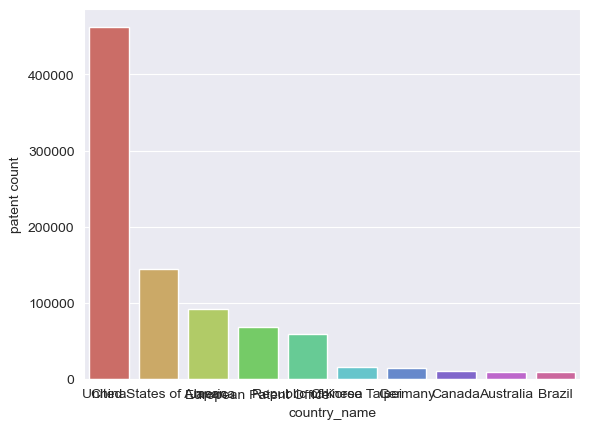

In [131]:
# create initial plot of patents by country
sns.barplot(x = 'country_name', y = 'patent count', data = df_country.head(10),
            palette = 'hls'
            )

plt.show()

China is clearly the leader in nuber of patents filed globally in the last 5 years - by a large margin

This will be later plotted in a presentable form in tableau.

# Patents by technology area analysis

In [132]:
df.head()

,publication_number,application_number,country_code,publication_date,filing_date,assignee,family_id,ipc,country_name,ipc_codes_full,ipc_subclass,ipc_class
0,EP-3716307-A1,EP-17932779-A,EP,20200930,20171218,['The 41st Institute of China Electronics Tech...,62031869,"[{'code': 'H01H50/00', 'inventive': True, 'fir...",European Patent Office,[H01H50/00],{H01},{H}
1,JP-2020191060-A,JP-2019151335-A,JP,20201126,20190821,"['廣達電腦股▲ふん▼有限公司Ｑｕａｎｔａ Ｃｏｍｐｕｔｅｒ Ｉｎｃ．', 'Quanta ...",67840994,"[{'code': 'G06F1/20', 'inventive': True, 'firs...",Japan,"[G06F1/20, H05K7/20, G06F1/16]","{H05, G06}","{G, H}"
3,US-2019015283-A1,US-201715648518-A,US,20190117,20170713,['James Earl Jackson'],65000790,"[{'code': 'A61H1/00', 'inventive': True, 'firs...",United States of America,"[A61H1/00, A41C1/00]","{A61, A41}",{A}
4,KR-20210078242-A,KR-20190170085-A,KR,20210628,20191218,['엘지디스플레이 주식회사'],76608219,"[{'code': 'G09F9/30', 'inventive': True, 'firs...",Republic of Korea,"[G09F9/30, G06F1/16, H01L51/00]","{H01, G09, G06}","{G, H}"
5,CN-113091512-A,CN-202110372226-A,CN,20210709,20210407,['合肥英睿系统技术有限公司'],76674690,"[{'code': 'F41G1/46', 'inventive': True, 'firs...",China,"[F41G1/46, F41G1/473]",{F41},{F}


In [133]:
#creating dataframe of class counts
class_count = df['ipc_class'].value_counts()
class_count = pd.DataFrame(class_count).reset_index()
class_count.columns = ['class', 'patent count'] # change column names
class_count

,class,patent count
0,{G},176749
1,{H},138313
2,{B},118638
3,{A},105554
4,{C},65104
...,...,...
182,"{D, E, B, G, H}",1
183,"{E, D, B, G, A}",1
184,"{D, E, A, B, G, F}",1
185,"{F, D, H, B}",1


In [134]:
## Summing up the counts for each class (patents with multiple classes will be counted once for each listed class)
class_list = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0}
for index in range(len(class_count['class'])):
    for cl in class_list:
        if cl in class_count['class'][index]:
            class_list[cl] += class_count['patent count'][index]

## Create a dataframe
df_class_list = pd.DataFrame.from_dict(class_list, orient='index').reset_index()
df_class_list

,index,0
0,A,166770
1,B,214738
2,C,142714
3,D,14056
4,E,45301
5,F,89946
6,G,278208


In [135]:
#rename the columns
df_class_list = df_class_list.rename(mapper={'index':'class', 0:'patent count'}, axis=1)

In [136]:
df_class_list

,class,patent count
0,A,166770
1,B,214738
2,C,142714
3,D,14056
4,E,45301
5,F,89946
6,G,278208


In [137]:
## mapping new class name to lookup dictionary
df_class_list['class_description'] = df_class_list['class']
df_class_list['class_description'] = df_class_list['class_description'].map(ipc_class)
df_class_list.sort_values(by=['patent count'], axis=0, ascending=False, inplace=True)
df_class_list.reset_index(drop=True, inplace=True)
df_class_list

,class,patent count,class_description
0,G,278208,PHYSICS
1,B,214738,PERFORMING OPERATIONS; TRANSPORTING
2,A,166770,HUMAN NECESSITIES
3,C,142714,CHEMISTRY; METALLURGY
4,F,89946,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEA...
5,E,45301,FIXED CONSTRUCTIONS
6,D,14056,TEXTILES; PAPER


In [138]:
## Doing the same for the subclasses
#creating dataframe of subclass counts
subclass_count = df['ipc_subclass'].value_counts()
subclass_count = pd.DataFrame(subclass_count).reset_index()
subclass_count.columns = ['subclass', 'patent count'] # change column names
subclass_count

,subclass,patent count
0,{G06},79645
1,{H04},55944
2,{A61},51224
3,{H01},47087
4,{G01},41310
...,...,...
26337,"{B22, B28, G05, G06}",1
26338,"{H04, G03, F21, H05, H03}",1
26339,"{H02, D21, C08}",1
26340,"{A61, E06, G01}",1


In [139]:
## To get a count of the subclasses - define the subclass count function. This cannot be done through .value_counts() because of the multiple listed subclasses for many patents.
def subclass_count_fn(dataframe):
    '''Function returning a dataframe of total count of patent subclasses - input must be a dataframe with ipc_subclass column'''
    subclass_count = dataframe['ipc_subclass'].value_counts()
    subclass_count = pd.DataFrame(subclass_count).reset_index()
    subclass_count.columns = ['subclass', 'patent count'] # change column names
# define dictionary of each code mapping to a counter - initialised at 0.
    subclass_list = {'A01' : 0,'A21' : 0,'A22' : 0,'A23' : 0,'A24' : 0,'A41' : 0, 'A42' : 0,'A43' : 0,'A44' : 0,'A45' : 0,'A46' : 0,'A47' : 0,'A61' : 0,'A62' : 0,'A63' : 0,
                     'A99' : 0,'B01' : 0,'B02' : 0,'B03' : 0,'B04' : 0,'B05' : 0,'B06' : 0,'B07' : 0,'B08' : 0,'B09' : 0,'B21' : 0,'B22' : 0,'B23' : 0,'B24' : 0,'B25' : 0,'B26' : 0,'B27' : 0,
                     'B28' : 0,'B29' : 0,'B30' : 0,'B31' : 0,'B32' : 0,'B33' : 0,'B41' : 0,'B42' : 0,'B43' : 0,'B44' : 0,'B60' : 0,'B61' : 0,'B62' : 0,'B63' : 0,'B64' : 0,'B65' : 0,'B66' : 0,
                     'B67' : 0,'B68' : 0,'B81' : 0,'B82' : 0,'B99' : 0,'C01' : 0,'C02' : 0,'C03' : 0,'C04' : 0,'C05' : 0,'C06' : 0,'C07' : 0,'C08' : 0,'C09' : 0,'C10' : 0,'C11' : 0,'C12' : 0,
                     'C13' : 0,'C14' : 0,'C21' : 0,'C22' : 0,'C23' : 0,'C25' : 0,'C30' : 0,'C40' : 0,'C99' : 0,'D01' : 0,'D02' : 0,'D03' : 0,'D04' : 0,'D05' : 0,'D06' : 0,'D07' : 0,'D21' : 0,
                     'D99' : 0,'E01' : 0,'E02' : 0,'E03' : 0,'E04' : 0,'E05' : 0,'E06' : 0,'E21' : 0,'E99' : 0,'F01' : 0,'F02' : 0,'F03' : 0,'F04' : 0,'F15' : 0,'F16' : 0,'F17' : 0,'F21' : 0,
                     'F22' : 0,'F23' : 0,'F24' : 0,'F25' : 0,'F26' : 0,'F27' : 0,'F28' : 0,'F41' : 0,'F42' : 0,'F99' : 0,'G01' : 0,'G02' : 0,'G03' : 0,'G04' : 0,'G05' : 0,'G06' : 0,'G07' : 0,
                     'G08' : 0,'G09' : 0,'G10' : 0,'G11' : 0,'G12' : 0,'G16' : 0,'G21' : 0,'G99' : 0,'H01' : 0,'H02' : 0,'H03' : 0,'H04' : 0,'H05' : 0,'H99' : 0,}
# loop though dataframe input and add to the counter dictionary for every appearance of a subclass code.
    for index in range(len(subclass_count['subclass'])):
        for sub in subclass_list:
            if sub in subclass_count['subclass'][index]:
                subclass_list[sub] += subclass_count['patent count'][index]

    # Create a dataframe
    df_subclass = pd.DataFrame.from_dict(subclass_list, orient='index').reset_index() #using subclass counter dictionary to create dataframe
    df_subclass = df_subclass.rename(mapper={'index':'subclass', 0:'patent count'}, axis=1) # rename the columns
    df_subclass.sort_values(by=['patent count'], axis=0, ascending=False, inplace=True) # sort by count descending
    df_subclass.reset_index(drop=True, inplace=True)
    df_subclass['class_description'] = df_subclass['subclass']
    df_subclass['class_description'] = df_subclass['class_description'].map(ipc_subclass_mapping) #set the class description to the mapping dictionary.
    df_subclass['subclass_proportion_%'] = (df_subclass['patent count']/df_subclass['patent count'].sum())*100 # create a column showing the percentage proportion of all subclass tags each tag is.
    return df_subclass

In [140]:
df_subclass_count = subclass_count_fn(df)

In [141]:
# We have a dataframe to analyse the subclass count of any given patent dataset.
df_subclass_count

,subclass,patent count,class_description,subclass_proportion_%
0,G06,134013,COMPUTING; CALCULATING OR COUNTING,10.096343
1,H04,97229,ELECTRIC COMMUNICATION TECHNIQUE,7.325090
2,A61,91001,MEDICAL OR VETERINARY SCIENCE; HYGIENE,6.855882
3,H01,85913,BASIC ELECTRIC ELEMENTS,6.472559
4,G01,80152,MEASURING; TESTING,6.038534
...,...,...,...,...
126,B99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,F99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


# Patents by territory and technology area analysis

## China, USA, Japan and Europe Case Studies

In [142]:
# case studies of technologies in CN, US, EP, JP

# first - extract a data frame for each territory
df_china = df[df['country_code'] == 'CN'].copy()
df_usa = df[df['country_code'] == 'US'].copy()
df_europe = df[df['country_code'] == 'EP'].copy()
df_japan = df[df['country_code'] == 'JP'].copy()

In [143]:
## Patent subclass breakdown for China
df_china_subclass = subclass_count_fn(df_china)
df_china_subclass

,subclass,patent count,class_description,subclass_proportion_%
0,G06,68190,COMPUTING; CALCULATING OR COUNTING,11.143067
1,G01,42734,MEASURING; TESTING,6.983250
2,H04,39104,ELECTRIC COMMUNICATION TECHNIQUE,6.390065
3,H01,31914,BASIC ELECTRIC ELEMENTS,5.215132
4,A61,31452,MEDICAL OR VETERINARY SCIENCE; HYGIENE,5.139636
...,...,...,...,...
126,F99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,E99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [144]:
## Patent subclass breakdown for USA
df_usa_subclass = subclass_count_fn(df_usa)
df_usa_subclass

,subclass,patent count,class_description,subclass_proportion_%
0,G06,33146,COMPUTING; CALCULATING OR COUNTING,14.124395
1,H04,27488,ELECTRIC COMMUNICATION TECHNIQUE,11.713370
2,H01,18604,BASIC ELECTRIC ELEMENTS,7.927661
3,A61,18230,MEDICAL OR VETERINARY SCIENCE; HYGIENE,7.768289
4,G01,12604,MEASURING; TESTING,5.370901
...,...,...,...,...
126,B99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,E99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [145]:
## Patent subclass breakdown for Europe
df_europe_subclass = subclass_count_fn(df_europe)
df_europe_subclass

,subclass,patent count,class_description,subclass_proportion_%
0,A61,10755,MEDICAL OR VETERINARY SCIENCE; HYGIENE,10.292457
1,H04,10284,ELECTRIC COMMUNICATION TECHNIQUE,9.841713
2,G06,7056,COMPUTING; CALCULATING OR COUNTING,6.752541
3,G01,5907,MEASURING; TESTING,5.652956
4,H01,5859,BASIC ELECTRIC ELEMENTS,5.607020
...,...,...,...,...
126,E99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,B99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,A99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [1]:
## Patent subclass breakdown for Japan
df_japan_subclass = subclass_count_fn(df_japan)
df_japan_subclass

NameError: name 'subclass_count_fn' is not defined

# Patents by assignee

In [147]:
def assignee_clean(string):
    ''' Function to clean assignee columns'''
    string = string.replace('[','')
    string = string.replace(']','')
    string = string.replace("'",'')
    return string


In [148]:
df['assignee'] = df.apply(lambda x: assignee_clean(x['assignee']), axis=1)
df.head(10)

,publication_number,application_number,country_code,publication_date,filing_date,assignee,family_id,ipc,country_name,ipc_codes_full,ipc_subclass,ipc_class
0,EP-3716307-A1,EP-17932779-A,EP,20200930,20171218,The 41st Institute of China Electronics Techno...,62031869,"[{'code': 'H01H50/00', 'inventive': True, 'fir...",European Patent Office,[H01H50/00],{H01},{H}
1,JP-2020191060-A,JP-2019151335-A,JP,20201126,20190821,"廣達電腦股▲ふん▼有限公司Ｑｕａｎｔａ Ｃｏｍｐｕｔｅｒ Ｉｎｃ．, Quanta Comp...",67840994,"[{'code': 'G06F1/20', 'inventive': True, 'firs...",Japan,"[G06F1/20, H05K7/20, G06F1/16]","{H05, G06}","{G, H}"
3,US-2019015283-A1,US-201715648518-A,US,20190117,20170713,James Earl Jackson,65000790,"[{'code': 'A61H1/00', 'inventive': True, 'firs...",United States of America,"[A61H1/00, A41C1/00]","{A61, A41}",{A}
4,KR-20210078242-A,KR-20190170085-A,KR,20210628,20191218,엘지디스플레이 주식회사,76608219,"[{'code': 'G09F9/30', 'inventive': True, 'firs...",Republic of Korea,"[G09F9/30, G06F1/16, H01L51/00]","{H01, G09, G06}","{G, H}"
5,CN-113091512-A,CN-202110372226-A,CN,20210709,20210407,合肥英睿系统技术有限公司,76674690,"[{'code': 'F41G1/46', 'inventive': True, 'firs...",China,"[F41G1/46, F41G1/473]",{F41},{F}
6,AU-2020285671-A1,AU-2020285671-A,AU,20211209,20200527,Kverneland Group Ravenna S.R.L.,67957338,"[{'code': 'A01F15/10', 'inventive': False, 'fi...",Australia,"[A01F15/10, A01F15/00]",{A01},{A}
7,CN-106304518-B,CN-201510242673-A,CN,20190416,20150513,华润矽威科技（上海）有限公司,57630890,"[{'code': 'H05B37/02', 'inventive': True, 'fir...",China,[H05B37/02],{H05},{H}
8,CN-111657088-A,CN-202010566953-A,CN,20200915,20200619,"江苏沿江地区农业科学研究所, 如皋市鑫磊生态家庭农场",72388926,"[{'code': 'C05G3/60', 'inventive': True, 'firs...",China,"[C05G3/60, C05F11/00, A01N65/30, A01P3/00, A01...","{C05, A01}","{A, C}"
9,CN-114239837-A,CN-202111586532-A,CN,20220325,20211223,树根互联股份有限公司,80761871,"[{'code': 'G06N7/00', 'inventive': True, 'firs...",China,[G06N7/00],{G06},{G}
10,JP-2021176159-A,JP-2020081026-A,JP,20211104,20200501,"三菱電機エンジニアリング株式会社, Mitsubishi Electric Engineer...",78300495,"[{'code': 'H01L35/06', 'inventive': True, 'fir...",Japan,"[H01L35/06, H02N11/00]","{H02, H01}",{H}


In [173]:
## Renaming non-English alphabet names to english alphabet names for to 50 corps - this was done through translating the names.
## Some sub-companies were merged with their parent - i.e. Samsung Display co. and Samsung Electronics
df['assignee'].replace(to_replace="华为技术有限公司", value = "Huawei Technologies Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="삼성전자주식회사", value = "Samsung Electronics Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="珠海格力电器股份有限公司", value = "Gree Electric Appliances Inc.", inplace=True)
df['assignee'].replace(to_replace="腾讯科技（深圳）有限公司", value = "Tencent Technology (Shenzhen) Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="浙江大学", value = "Zhejiang University of Technology", inplace=True)
df['assignee'].replace(to_replace="엘지전자 주식회사", value = "Lg Electronics Inc.", inplace=True)
df['assignee'].replace(to_replace="维沃移动通信有限公司", value = "Vivo Communication Technology Co. Ltd.", inplace=True)
df['assignee'].replace(to_replace="三菱電機株式会社", value = "Mitsubishi Electric Corporation", inplace=True)
df['assignee'].replace(to_replace="天津大学", value = "Tianjin University", inplace=True)
df['assignee'].replace(to_replace="キヤノン株式会社, Canon Inc", value = "Canon Inc", inplace=True)
df['assignee'].replace(to_replace="Canon Kabushiki Kaisha", value = "Canon Inc", inplace=True)
df['assignee'].replace(to_replace="Oppo广东移动通信有限公司", value = "Guangdong Oppo Mobile Telecommunications Corp., Ltd", inplace=True)
df['assignee'].replace(to_replace="トヨタ自動車株式会社, Toyota Motor Corp", value = "Toyota Motor Corp", inplace=True)
df['assignee'].replace(to_replace="清华大学", value = "Tsinghua University", inplace=True)
df['assignee'].replace(to_replace="주식회사 엘지화학", value = "LG Chem", inplace=True)
df['assignee'].replace(to_replace="华南理工大学", value = "South China University of Technology", inplace=True)
df['assignee'].replace(to_replace="电子科技大学", value = "Chengdu University", inplace=True)
df['assignee'].replace(to_replace="三星电子株式会社", value = "Samsung Electronics Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="西安交通大学", value = "Xi'an Jiaotong University", inplace=True)
df['assignee'].replace(to_replace="东南大学", value = "Southeast China University", inplace=True)
df['assignee'].replace(to_replace="阿里巴巴集团控股有限公司", value = "Alibaba Group", inplace=True)
df['assignee'].replace(to_replace="Samsung Display Co., Ltd.", value = "Samsung Electronics Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="中兴通讯股份有限公司", value = "ZTE", inplace=True)
df['assignee'].replace(to_replace="キヤノン株式会社", value = "Canon Inc", inplace=True)
df['assignee'].replace(to_replace="华中科技大学", value = "Huazhong University of Science and Technology", inplace=True)
df['assignee'].replace(to_replace="中南大学", value = "Central South University Changsha", inplace=True)
df['assignee'].replace(to_replace="삼성디스플레이 주식회사", value = "Samsung Electronics Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="浙江工业大学", value = "Zhejiang University of Technology", inplace=True)
df['assignee'].replace(to_replace="北京航空航天大学", value = "Beihang University", inplace=True)
df['assignee'].replace(to_replace="哈尔滨工业大学", value = "Harbin Institute of Technology", inplace=True)
df['assignee'].replace(to_replace="吉林大学", value = "Jilin University", inplace=True)
df['assignee'].replace(to_replace="엘지디스플레이 주식회사", value = "Lg Electronics Inc.", inplace=True)
df['assignee'].replace(to_replace="パナソニックＩｐマネジメント株式会社", value = "Panasonic Intellectual Property Management Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="南京航空航天大学", value = "Nanjing University of Aeronautics and Astronautics", inplace=True)
df['assignee'].replace(to_replace="山东大学", value = "Shandong University", inplace=True)
df['assignee'].replace(to_replace="パナソニックＩｐマネジメント株式会社, Panasonic Ip Management Corp", value = "Panasonic Intellectual Property Management Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="上海交通大学", value = "Shanghai Jiaotong University", inplace=True)
df['assignee'].replace(to_replace="平安科技（深圳）有限公司", value = "Ping An Technology", inplace=True)
df['assignee'].replace(to_replace="苏州浪潮智能科技有限公司", value = "Suzhou Inspur Intelligent Technology Co., Ltd.", inplace=True)
df['assignee'].replace(to_replace="北京理工大学", value = "Beijing Institute of Technology", inplace=True)
df['assignee'].replace(to_replace="北京百度网讯科技有限公司", value = "Beijing Baidu Netcom Technology Co., Ltd", inplace=True)
df['assignee'].replace(to_replace="高通股份有限公司", value = "Qualcomm Incorporated", inplace=True)

In [174]:
# counts of assignees - most frequent globally
assignee_count = df['assignee'].value_counts()
assignee_count = pd.DataFrame(assignee_count).reset_index()
assignee_count.rename(mapper={'index':'Assignee', 'assignee':'patent count'}, axis=1, inplace=True)
assignee_count.head(50)

,Assignee,patent count
0,"Samsung Electronics Co., Ltd.",7905
1,"Huawei Technologies Co., Ltd.",5054
2,Canon Inc,3671
3,International Business Machines Corporation,3293
4,Lg Electronics Inc.,3262
5,Qualcomm Incorporated,2274
6,Panasonic Intellectual Property Management Co....,2238
7,Zhejiang University of Technology,2085
8,Mitsubishi Electric Corporation,2013
9,Gree Electric Appliances Inc.,1742


In [175]:
## Grouping chinese educational institutions
df_assignee_grouped = df.copy()
df_assignee_grouped['assignee'].replace(to_replace="Zhejiang University of Technology", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Tianjin University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Tsinghua University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="South China University of Technology", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Chengdu University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Xi'an Jiaotong University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Southeast China University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Huazhong University of Science and Technology", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Central South University Changsha", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Zhejiang University of Technology", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Beihang University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Harbin Institute of Technology", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Jilin University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Nanjing University of Aeronautics and Astronautics", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Shandong University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Shanghai Jiaotong University", value = "Chinese Educational Institutions", inplace=True)
df_assignee_grouped['assignee'].replace(to_replace="Beijing Institute of Technology", value = "Chinese Educational Institutions", inplace=True)
assignee_count_CN_uni_grouped = df_assignee_grouped['assignee'].value_counts()
assignee_count_CN_uni_grouped = pd.DataFrame(assignee_count_CN_uni_grouped).reset_index()
assignee_count_CN_uni_grouped.rename(mapper={'index':'Assignee', 'assignee':'patent count'}, axis=1, inplace=True)
assignee_count_CN_uni_grouped.head(36)

,Assignee,patent count
0,Chinese Educational Institutions,14373
1,"Samsung Electronics Co., Ltd.",7905
2,"Huawei Technologies Co., Ltd.",5054
3,Canon Inc,3671
4,International Business Machines Corporation,3293
5,Lg Electronics Inc.,3262
6,Qualcomm Incorporated,2274
7,Panasonic Intellectual Property Management Co....,2238
8,Mitsubishi Electric Corporation,2013
9,Gree Electric Appliances Inc.,1742


In [176]:
# counts of assignees - US and EP case studies
assignee_count_usa = df_usa['assignee'].value_counts()
assignee_count_usa = pd.DataFrame(assignee_count_usa).reset_index()
assignee_count_usa.rename(mapper={'index':'Assignee', 'assignee':'patent count'}, axis=1, inplace=True)
assignee_count_usa.head(10)

,Assignee,patent count
0,['International Business Machines Corporation'],3252
1,"['Samsung Electronics Co., Ltd.']",2288
2,['Intel Corporation'],1283
3,['Canon Kabushiki Kaisha'],1219
4,['Qualcomm Incorporated'],1106
5,['Lg Electronics Inc.'],1082
6,"['Microsoft Technology Licensing, Llc']",997
7,"['Huawei Technologies Co., Ltd.']",978
8,['Apple Inc.'],947
9,['Toyota Jidosha Kabushiki Kaisha'],811


In [177]:
# counts of assignees - US and EP case studies
assignee_count_europe = df_europe['assignee'].value_counts()
assignee_count_europe = pd.DataFrame(assignee_count_europe).reset_index()
assignee_count_europe.rename(mapper={'index':'Assignee', 'assignee':'patent count'}, axis=1, inplace=True)
assignee_count_europe.head(10)

,Assignee,patent count
0,"['Huawei Technologies Co., Ltd.']",1266
1,"['Samsung Electronics Co., Ltd.']",1037
2,['LG Electronics Inc.'],491
3,['Koninklijke Philips N.V.'],417
4,['Telefonaktiebolaget LM Ericsson (publ)'],407
5,['Siemens Aktiengesellschaft'],401
6,['Qualcomm Incorporated'],379
7,['Robert Bosch GmbH'],372
8,"['Microsoft Technology Licensing, LLC']",362
9,['Mitsubishi Electric Corporation'],353


# Trends by year

In [178]:
df_2018 = df[df['publication_date'] < 20190000].copy()

In [179]:
df_2019 = df[ (df['publication_date'] < 20200000) & (df['publication_date'] >= 20190000)].copy()

In [180]:
df_2020 = df[ (df['publication_date'] < 20210000) & (df['publication_date'] >= 20200000)].copy()

In [181]:
df_2021 = df[ (df['publication_date'] < 20220000) & (df['publication_date'] >= 20210000)].copy()

In [182]:
df_2022 = df[df['publication_date'] >= 20220000].copy()

In [183]:
## total number of patents filed per year
print(f'Patents published in 2018: {len(df_2018)}')
print(f'Patents published in 2019: {len(df_2019)}')
print(f'Patents published in 2020: {len(df_2020)}')
print(f'Patents published in 2021: {len(df_2021)}')
print(f'Patents published by June 2022: {len(df_2022)}')

Patents published in 2018: 195588
Patents published in 2019: 196906
Patents published in 2020: 197021
Patents published in 2021: 214100
Patents published by June 2022: 117846


In [184]:
## differences in types of tech pre and post covid?

In [185]:
df_pre_pandemic = df[df['publication_date'] < 20210600].copy()
df_post_pandemic = df[df['publication_date'] > 20210600].copy()

In [186]:
subclass_count_fn(df_pre_pandemic)

,subclass,patent count,class_description,subclass_proportion_%
0,G06,92921,COMPUTING; CALCULATING OR COUNTING,9.559577
1,H04,71134,ELECTRIC COMMUNICATION TECHNIQUE,7.318162
2,A61,66910,MEDICAL OR VETERINARY SCIENCE; HYGIENE,6.883603
3,H01,62699,BASIC ELECTRIC ELEMENTS,6.450382
4,G01,57857,MEASURING; TESTING,5.952244
...,...,...,...,...
126,B99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,F99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [187]:
subclass_count_fn(df_post_pandemic)

,subclass,patent count,class_description,subclass_proportion_%
0,G06,41092,COMPUTING; CALCULATING OR COUNTING,11.564722
1,H04,26095,ELECTRIC COMMUNICATION TECHNIQUE,7.344043
2,A61,24091,MEDICAL OR VETERINARY SCIENCE; HYGIENE,6.780047
3,H01,23214,BASIC ELECTRIC ELEMENTS,6.533229
4,G01,22295,MEASURING; TESTING,6.274590
...,...,...,...,...
126,B99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,F99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


## Datasets and Visualisations

In [188]:
## Datasets being used:

In [189]:
df_country

,country code,patent count,country_name,proportion_%
0,CN,462481,China,50.189970
1,US,144679,United States of America,15.701044
2,JP,92468,Japan,10.034934
3,EP,68402,European Patent Office,7.423212
4,KR,58783,Republic of Korea,6.379326
...,...,...,...,...
67,EE,5,Estonia,0.000543
68,SV,4,El Salvador,0.000434
69,IS,3,Iceland,0.000326
70,MC,1,Monaco,0.000109


In [190]:
df_subclass_count

,subclass,patent count,class_description,subclass_proportion_%
0,G06,134013,COMPUTING; CALCULATING OR COUNTING,10.096343
1,H04,97229,ELECTRIC COMMUNICATION TECHNIQUE,7.325090
2,A61,91001,MEDICAL OR VETERINARY SCIENCE; HYGIENE,6.855882
3,H01,85913,BASIC ELECTRIC ELEMENTS,6.472559
4,G01,80152,MEASURING; TESTING,6.038534
...,...,...,...,...
126,B99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,F99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [191]:
df_china_subclass

,subclass,patent count,class_description,subclass_proportion_%
0,G06,68190,COMPUTING; CALCULATING OR COUNTING,11.143067
1,G01,42734,MEASURING; TESTING,6.983250
2,H04,39104,ELECTRIC COMMUNICATION TECHNIQUE,6.390065
3,H01,31914,BASIC ELECTRIC ELEMENTS,5.215132
4,A61,31452,MEDICAL OR VETERINARY SCIENCE; HYGIENE,5.139636
...,...,...,...,...
126,F99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,E99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [192]:
df_usa_subclass

,subclass,patent count,class_description,subclass_proportion_%
0,G06,33146,COMPUTING; CALCULATING OR COUNTING,14.124395
1,H04,27488,ELECTRIC COMMUNICATION TECHNIQUE,11.713370
2,H01,18604,BASIC ELECTRIC ELEMENTS,7.927661
3,A61,18230,MEDICAL OR VETERINARY SCIENCE; HYGIENE,7.768289
4,G01,12604,MEASURING; TESTING,5.370901
...,...,...,...,...
126,B99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,E99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [193]:
df_europe_subclass

,subclass,patent count,class_description,subclass_proportion_%
0,A61,10755,MEDICAL OR VETERINARY SCIENCE; HYGIENE,10.292457
1,H04,10284,ELECTRIC COMMUNICATION TECHNIQUE,9.841713
2,G06,7056,COMPUTING; CALCULATING OR COUNTING,6.752541
3,G01,5907,MEASURING; TESTING,5.652956
4,H01,5859,BASIC ELECTRIC ELEMENTS,5.607020
...,...,...,...,...
126,E99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,B99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,A99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [194]:
df_japan_subclass

,subclass,patent count,class_description,subclass_proportion_%
0,H01,12081,BASIC ELECTRIC ELEMENTS,8.425039
1,G06,10154,COMPUTING; CALCULATING OR COUNTING,7.081189
2,A61,8809,MEDICAL OR VETERINARY SCIENCE; HYGIENE,6.143214
3,H04,8433,ELECTRIC COMMUNICATION TECHNIQUE,5.880999
4,G01,7145,MEASURING; TESTING,4.982775
...,...,...,...,...
126,C99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
127,D99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
128,E99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000
129,A99,0,SUBJECT MATTER NOT OTHERWISE PROVIDED FOR IN T...,0.000000


In [195]:
assignee_count

,Assignee,patent count
0,"Samsung Electronics Co., Ltd.",7905
1,"Huawei Technologies Co., Ltd.",5054
2,Canon Inc,3671
3,International Business Machines Corporation,3293
4,Lg Electronics Inc.,3262
...,...,...
345265,蜻蜓实验室(深圳)有限公司,1
345266,ライオンデル ケミカル テクノロジー、エル．ピー．,1
345267,李自勇,1
345268,Zarbaña Digital Fund Llc,1


In [196]:
#Export Required dataframes
df_country.to_csv('patents_by_country.csv')
df_country.head(15).to_csv('pat_by_country_top15.csv')
df_subclass_count.to_csv('patents_by_subclass.csv')
df_subclass_count.head(15).to_csv('patents_by_subclass_top15.csv')
df_china_subclass.to_csv('china_subclass.csv')
df_china_subclass.head(15).to_csv('china_subclass_top15.csv')
df_usa_subclass.to_csv('usa_subclass.csv')
df_usa_subclass.head(15).to_csv('usa_subclass_top15.csv')
df_europe_subclass.to_csv('europe_subclass.csv')
df_europe_subclass.head(15).to_csv('europe_subclass_top15.csv')
df_japan_subclass.to_csv('japan_subclass.csv')
df_japan_subclass.head(15).to_csv('japan_subclass_top15.csv')
assignee_count.to_csv('patents_by_assignee.csv')
assignee_count.head(50).to_csv('patents_by_assignee_top50.csv')
assignee_count_CN_uni_grouped.head(36).to_csv('Chinese_University_Grouped_assignee_count.csv')

Graphing and subsequent analysis was performed on Tableau